In [623]:
import pandas as pd
import numpy as np 
from faker import Faker
from enum import Enum
from typing import List, Any, Tuple
import string
import uuid
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL, FRAME
from html import escape

In [141]:
person_entity = {
    "userId": str, 
    "username": str, 
    "password": str, 
    "email": str, 
    "name": str, 
    "surname": str, 
    "clinical_gender": ["M", "F"], 
    "current_location": [], 
    "age_range": ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"],
    "living_country": [], 
    "country_of_origin": []
    }

user_entity = {
    "current_working_status": ["Half-time-worker", "Full-time-worker", "Self-employee", "Unemployed"],
    "marital_status": ["Single", "Married"], 
    "life_style": ["Sedentary", "Lightly active", "Moderately active", "Very active"], 
    "weight": [],
    "ethnicity": ["White", "Black", "Latino", "Asian"], 
    "height": []
}

cultural_factors = {
    "vegan_observant": [True, False],
    "vegetarian_observant": [True, False], 
    "halal_observant": [True, False], 
    "kosher_observant": [True, False],
    "religion_observant": [True, False], 
    "drink_limitation": [True, False], 
    "pescatarian_observant": [True, False],
    "religion": [],
    "food_limitation": []
}

sustainability = {
    "environmental_harm": [],
    "eco_score": [],
    "co2_food_print": [],
    "recyclable_packaging": []
}

actions = {
    "action_type": [],
    "location": [], 
    "action_date": []
}

preferences = {
    "breakfast_time": [],
    "lunch_time": [],
    "dinner_time": []
}

health_conditions = {
    "food_allergies": []
}

user_goals = {
    "user_goals": ["loss_weight", "fit", "food_restrictions"]
}

cultural_factors = {
    "cultural_factors": []
}

diet = {
    "diet_daily_calories": [],
    "calorie_deficit": []
}

    

In [8]:
df_personal_data = pd.DataFrame(data=[], columns = list(person_entity.keys()))

In [13]:
# set seed for random generator 
np.random.seed(0)

In [14]:
df_personal_data["clinical_gender"] = np.random.choice(np.array(person_entity.get("clinical_gender")), 
                                                       size=500, 
                                                       replace=True, 
                                                       p=[0.5, 0.5])

In [19]:
fake = Faker()

In [18]:
class Gender(str, Enum):
    male = "M"
    female = "F"

In [22]:
def create_name_surname(gender: str) -> str:
    if gender == Gender.male:
        names = fake.name_male()
    else:
        names = fake.name_female()
    return names.split(" ")

In [53]:
def generate_country(samples) -> List:
    return list(map(lambda x: fake.country(), range(samples)))

In [60]:
def generate_email_from_name(name: str, surname: str, domain: str="fake.com"):
    return f"{name.lower()}.{surname.lower()}@{domain.lower()}"

In [96]:
def password_generation(length): 
    chars = string.ascii_letters + string.digits
    list_chars = list(chars)
    password = np.random.choice(list_chars, length)
    return ''.join(password)

In [115]:
def generate_age_range(probabilities = None, list_age_range:List = person_entity.get("age_range")):
    return np.random.choice(list_age_range, size=1, replace=True, p=probabilities)[0]

In [128]:
def generate_localization(samples): 
    return list(map(lambda x: fake.locale(), range(samples)))

In [30]:
names = df_personal_data["clinical_gender"].apply(create_name_surname)

In [37]:
names_list = list(zip(*names))

In [38]:
df_personal_data["name"] = names_list[0]
df_personal_data["surname"] = names_list[1]

In [129]:
df_personal_data["country_of_origin"] = generate_country(500)
df_personal_data["living_country"] = generate_country(500)
df_personal_data["current_location"] = generate_country(500)
df_personal_data["current_location"] = generate_localization(500)

In [76]:
list_names = list(zip(*df_personal_data[["name", "surname"]].values.tolist()))

In [80]:
df_personal_data["email"] =list(map(lambda x, y: generate_email_from_name(x, y), list_names[0], list_names[1]))

In [98]:
df_personal_data["password"] = list(map(lambda x: password_generation(8), range(500)))

In [110]:
df_personal_data["username"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])
df_personal_data["userId"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])

In [122]:
df_personal_data["age_range"] = list(map(lambda x: generate_age_range(), range(500)))

In [130]:
df_personal_data.head(7)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,cynthiaa85a,cynthiabf65,uR2aKTPc,cynthia.franklin@fake.com,Cynthia,Franklin,F,ka_GE,30-39,Guadeloupe,Canada
1,gloria81ec,gloriaa8e7,Hmp2Hxmf,gloria.flores@fake.com,Gloria,Flores,F,el_GR,20-29,Guinea,Guadeloupe
2,karena0a0,karen9701,Mbkg9gMM,karen.mason@fake.com,Karen,Mason,F,lo_LA,90-100,Peru,Germany
3,autumnbd78,autumn9165,lYvYYZcm,autumn.peterson@fake.com,Autumn,Peterson,F,gv_GB,20-29,Monaco,Sao Tome and Principe
4,robert9174,robert8465,DjZif01R,robert.moore@fake.com,Robert,Moore,M,de_LU,20-29,Antigua and Barbuda,Niger
5,anna9399,anna924c,bRpmVmv4,anna.roberts@fake.com,Anna,Roberts,F,pt_BR,40-49,French Guiana,Russian Federation
6,anthonyb087,anthony9d52,sznECSPv,anthony.house@fake.com,Anthony,House,M,my_MM,50-59,Cambodia,Turkey


In [131]:
# save data 
df_personal_data.to_csv("personal_profiles.csv", index=False)

# 2. Generate User data 

In [200]:
user_columns = ["userId", "current_working_status", "marital_status", "life_style", "weight", "ethnicity", "height"]
df_user_entity = pd.DataFrame(data=[], columns=user_columns)

In [201]:
df_user_entity["userId"] = df_personal_data["userId"]

In [202]:
def choose_one_from_list(list_values: List, 
                         samples : int,  
                         probabilities: List = None, 
                         size: int =1,
                         replace: bool = True):
    return list(map(lambda x: np.random.choice(list_values, size=size, replace=replace, p=probabilities), range(samples)))

In [203]:
df_user_entity["current_working_status"] = choose_one_from_list(user_entity.get("current_working_status"), samples=500)
df_user_entity["marital_status"] = choose_one_from_list(user_entity.get("marital_status"), samples=500)
df_user_entity["life_style"] = choose_one_from_list(user_entity.get("life_style"), samples=500)
df_user_entity["ethnicity"] = choose_one_from_list(user_entity.get("ethnicity"), samples=500)

In [204]:
# generate BMI cases 
BMI_values = ["underweight", "healthy", "overweight", "obesity"]
BMI_prob = [0.1, 0.3, 0.3, 0.3]
bmis = np.random.choice(BMI_values, size=500, replace=True, p=BMI_prob)

In [205]:
male_height = np.random.normal(170, 10, 500)
female_height = np.random.normal(160, 10, 500)

In [206]:
# set height 
df_user_entity["BMI"] = bmis

In [207]:
df_user_entity.loc[df_personal_data["clinical_gender"] == 'F',"height"] = np.random.choice(female_height, size=246)
df_user_entity.loc[df_personal_data["clinical_gender"] == 'M',"height"] = np.random.choice(male_height, size=254)

In [208]:
df_user_entity["height"] = df_user_entity["height"].astype(int)

In [235]:
class BMI_constants(str, Enum):
    underweight = "underweight"
    healthy = "healthy"
    overweight = "overweight"
    obesity = "obesity"

In [210]:
# set the weight 
def calculate_weight_from_height(height: float, bmi: string):
    bmi_numeric = 0.0
    if bmi == BMI_constants.underweight:
        bmi_numeric = 18.0
    elif bmi == BMI_constants.healthy:
        bmi_numeric = 21.0
    elif bmi == BMI_constants.overweight:
        bmi_numeric = 28.0
    else:
        bmi_numeric = 32.0
    return (height**2)*bmi_numeric

In [211]:
df_user_entity["weight"] = np.round(df_user_entity.apply(lambda row: calculate_weight_from_height(row["height"]/100.0, row["BMI"]), axis=1), 2)

In [212]:
df_user_entity["current_working_status"] = df_user_entity["current_working_status"].apply(lambda x: x[0])
df_user_entity["marital_status"] = df_user_entity["marital_status"].apply(lambda x: x[0])
df_user_entity["life_style"] = df_user_entity["life_style"].apply(lambda x: x[0])
df_user_entity["ethnicity"] = df_user_entity["ethnicity"].apply(lambda x: x[0])

In [213]:
df_user_entity.head(6)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,cynthiaa85a,Half-time-worker,Married,Very active,47.88,Asian,151,healthy
1,gloria81ec,Half-time-worker,Married,Lightly active,65.55,White,153,overweight
2,karena0a0,Unemployed,Single,Moderately active,41.04,Latino,151,underweight
3,autumnbd78,Full-time-worker,Married,Moderately active,50.45,Latino,155,healthy
4,robert9174,Half-time-worker,Married,Sedentary,67.29,Black,179,healthy
5,anna9399,Full-time-worker,Single,Moderately active,40.50,Asian,150,underweight


In [214]:
df_user_entity.to_csv("user_entity.csv", index=False)

# 3. Generate health conditions 

In [217]:
df_health_conditions = pd.DataFrame(data=[], columns=["userId", "allergy"])

In [219]:
df_health_conditions["userId"] = df_user_entity["userId"]

In [223]:
# allergy array 
allergies = ["cow's milk", "eggs", "peanut", "soy", "fish", "tree nuts", "shellfish", "wheat", "None"]
allergies_prob = [0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.4]

In [224]:
user_allergies = np.random.choice(allergies, size=500, replace=True, p = allergies_prob)

In [226]:
df_health_conditions["allergy"] = user_allergies

In [231]:
df_health_conditions.head(6)

,userId,allergy
0,cynthiaa85a,fish
1,gloria81ec,None
2,karena0a0,None
3,autumnbd78,None
4,robert9174,None
5,anna9399,shellfish


In [232]:
df_health_conditions.to_csv("health_conditions.csv", index=False)

# 4. Generate user goals

In [233]:
# define user goals 
# define loose weight 
df_user_goals = pd.DataFrame(columns=["userId", "nutrition_goal"], data=[])

In [234]:
df_user_goals["userId"] = df_user_entity["userId"]

In [246]:
class NutritionGoals(str, Enum):
    lose_weight = "lose_weight"
    maintain_fit = "maintain_fit"
    gain_weight = "gain_weight"

In [241]:
def define_user_goal_according_BMI(bmi: str):
    if bmi == BMI_constants.underweight:
        # goal gain muscle 
        return f"{NutritionGoals.gain_weight}"
    elif bmi == BMI_constants.healthy:
        # Maintain fit and increase activity if required 
        return f"{NutritionGoals.maintain_fit}"
    else:
        # nutritional goal loss weight 
        return f"{NutritionGoals.lose_weight}"

In [247]:
df_user_goals["nutrition_goal"]=df_user_entity["BMI"].apply(lambda x: define_user_goal_according_BMI(x))

In [248]:
df_user_goals.head(6)

,userId,nutrition_goal
0,cynthiaa85a,maintain_fit
1,gloria81ec,lose_weight
2,karena0a0,gain_weight
3,autumnbd78,maintain_fit
4,robert9174,maintain_fit
5,anna9399,gain_weight


# 4. Generate cultural factors 

In [250]:
df_cultural_factors = pd.DataFrame(data=[], columns=["userId", "cultural_factor"])

In [260]:
df_cultural_factors["userId"] = df_personal_data["userId"]

In [255]:
food_restrictions = ["vegan_observant", "vegetarian_observant", "halal_observant", "kosher_observant", "None"]
food_restriction_probs = [0.2, 0.3, 0.05, 0.05, 0.4]

In [256]:
food_restrictions_user = np.random.choice(food_restrictions, size=500, replace=True, p=food_restriction_probs)

In [258]:
df_cultural_factors["cultural_factor"] = food_restrictions_user

In [261]:
df_cultural_factors.head(6)

,userId,cultural_factor
0,cynthiaa85a,vegan_observant
1,gloria81ec,None
2,karena0a0,None
3,autumnbd78,vegetarian_observant
4,robert9174,None
5,anna9399,None


In [263]:
df_cultural_factors.to_csv("cultural_factors.csv", index=False)

# 5. Generate preferences

In [264]:
df_preferences = pd.DataFrame(data=[], columns=["userId", "breakfast_time", "lunch_time", "dinner_time"])

In [266]:
df_preferences["userId"] = df_personal_data["userId"]

In [268]:
breakfast_time = np.random.normal(7, 1, size=500)
lunch_time = np.random.normal(13, 1, size=500)
dinner_time = np.random.normal(20, 1, size=500)

In [271]:
df_preferences["breakfast_time"] = np.round(breakfast_time, 2)
df_preferences["lunch_time"] = np.round(lunch_time, 2)
df_preferences["dinner_time"] = np.round(dinner_time, 2)

In [272]:
df_preferences.head(6)

,userId,breakfast_time,lunch_time,dinner_time
0,cynthiaa85a,7.15,11.98,22.33
1,gloria81ec,6.96,13.32,20.13
2,karena0a0,6.14,13.31,19.69
3,autumnbd78,4.91,13.90,18.16
4,robert9174,6.80,13.72,20.36
5,anna9399,6.33,13.36,21.48


In [273]:
df_preferences.to_csv("preferences.csv", index=False)

# 6. Generate Therapy (Diet)

Based on Harris-Benedict equations:
* For men: 
  $BMR = 13.397W + 4.799H - 5.677A + 88.362$
* For women: 
  $BMR = 9.247W + 3.098H - 4.330A + 447.593$

In [275]:
def calculate_basal_metabolic_rate(weight: float, height: float, age: int, clinical_gender: str):
    BMR = 0
    if Gender.male == clinical_gender:
        BMR = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        BMR = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    return BMR

In [277]:
class ActivityLevel(str, Enum): 
    sedentary = "Sedentary"
    light_active = "Lightly active"
    moderate_active = "Moderately active"
    very_active = "Very active"

In [279]:
def calculate_daily_calorie_needs(BMR: float, activity_level: str):
    calories_daily = 0
    if activity_level == ActivityLevel.sedentary:
        calories_daily = 1.2 * BMR
    elif activity_level == ActivityLevel.light_active:
        calories_daily = 1.375 * BMR
    elif activity_level == ActivityLevel.moderate_active:
        calories_daily = 1.725 * BMR
    else:
        calories_daily = 1.9 * BMR
    return calories_daily

In [286]:
def define_daily_calorie_needs(nutrition_goal: str, daily_calorie_need: float):
    projected_calories_need = 0 
    if nutrition_goal == NutritionGoals.gain_weight:
        projected_calories_need = daily_calorie_need + 500
    elif nutrition_goal == NutritionGoals.maintain_fit:
        projected_calories_need = daily_calorie_need
    else:
        projected_calories_need = daily_calorie_need - 500
    return projected_calories_need

In [319]:
def generate_diet_plan(weight: float, 
                       height: float, 
                       age_range: str, 
                       clinical_gender: str, 
                       activity_level: str, 
                       nutrition_goal: str): 
    # transform age 
    age_list = age_range.split("-")
    age = np.ceil((int(age_list[-1]) - int(age_list[0]))/2 + int(age_list[0]))
    bmr = calculate_basal_metabolic_rate(weight, height, age, clinical_gender)
    calorie_needs = calculate_daily_calorie_needs(bmr, activity_level)
    projected_calorie_needs = define_daily_calorie_needs(nutrition_goal, calorie_needs)
    return projected_calorie_needs
    

In [281]:
# generate treatment for the users 
df_treatment = pd.DataFrame(data=[], columns=["userId", "projected_daily_calories"])


In [296]:
# prepare data
df_user_data = df_user_goals.merge(df_personal_data[["userId", "clinical_gender", "age_range"]],
                                  on="userId")


In [298]:
df_user_data = df_user_data.merge(df_user_entity[["userId","life_style", "weight", "height"]], 
                                  on="userId")

In [325]:
df_treatment["projected_daily_calories"] = np.ceil(df_user_data.apply(lambda row: generate_diet_plan(weight=row["weight"], 
                                                  height=row["height"], 
                                                  age_range=row["age_range"],
                                                  clinical_gender=row["clinical_gender"],
                                                  activity_level=row["life_style"],
                                                  nutrition_goal=row["nutrition_goal"]
                                                  ), axis=1))

In [326]:
df_treatment.head(4)

,userId,projected_daily_calories
0,cynthiaa85a,2293.0
1,gloria81ec,1452.0
2,karena0a0,2025.0
3,autumnbd78,2219.0


In [327]:
df_treatment.to_csv("projected_calories.csv", index=False)

In [330]:
df_treatment["projected_daily_calories"].min(axis=0)

716.0

In [331]:
df_cultural_factors

,userId,cultural_factor
0,cynthiaa85a,vegan_observant
1,gloria81ec,None
2,karena0a0,None
3,autumnbd78,vegetarian_observant
4,robert9174,None
...,...,...
495,justina50a,None
496,tyler8373,vegan_observant
497,markb904,vegetarian_observant
498,richard8319,vegan_observant


# 7. Data Analysis

In [333]:
df_personal_data.head(3)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,cynthiaa85a,cynthiabf65,uR2aKTPc,cynthia.franklin@fake.com,Cynthia,Franklin,F,ka_GE,30-39,Guadeloupe,Canada
1,gloria81ec,gloriaa8e7,Hmp2Hxmf,gloria.flores@fake.com,Gloria,Flores,F,el_GR,20-29,Guinea,Guadeloupe
2,karena0a0,karen9701,Mbkg9gMM,karen.mason@fake.com,Karen,Mason,F,lo_LA,90-100,Peru,Germany


In [345]:
df_user_entity.head(4)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,cynthiaa85a,Half-time-worker,Married,Very active,47.88,Asian,151,healthy
1,gloria81ec,Half-time-worker,Married,Lightly active,65.55,White,153,overweight
2,karena0a0,Unemployed,Single,Moderately active,41.04,Latino,151,underweight
3,autumnbd78,Full-time-worker,Married,Moderately active,50.45,Latino,155,healthy


In [372]:
df_health_conditions.head(3)

,userId,allergy
0,cynthiaa85a,fish
1,gloria81ec,None
2,karena0a0,None


In [388]:
users = df_user_entity[df_user_entity["BMI"] == "underweight"]["userId"]

In [395]:
list(users.values)

['karena0a0',
 'anna9399',
 'nicole8cf0',
 'carlosac7e',
 'chad9c16',
 'christineb68e',
 'martha97ae',
 'russell8ba0',
 'taylorb6fb',
 'stephanie9dc0',
 'anita8e1b',
 'robert9408',
 'sheila8ee7',
 'james905d',
 'michael90e3',
 'jacobbb69',
 'dawnbcec',
 'jamie9a39',
 'andreab665',
 'patricka19a',
 'james9960',
 'gary9a04',
 'ambera045',
 'robertaef3',
 'katrina8bff',
 'kevina02a',
 'gracea6c3',
 'paulb627',
 'paulb293',
 'jonathan9229',
 'katherinea872',
 'benjamina636',
 'kevin84dc',
 'robert8929',
 'sheryla8dc',
 'ashlee85fa',
 'adrianab88e',
 'joseph88ac',
 'craiga9a6',
 'samuel8715',
 'amy8326',
 'joannae38',
 'markad86',
 'donnab2bf',
 'nicole871c']

In [409]:
vals = df_health_conditions["allergy"].value_counts()

In [418]:
list(zip(list(vals.index), list(vals.values)))

[('None', 195),
 ('peanut', 45),
 ('shellfish', 41),
 ('eggs', 41),
 ('tree nuts', 39),
 ('soy', 37),
 ("cow's milk", 37),
 ('fish', 35),
 ('wheat', 30)]

In [411]:
vals.index

Index(['None', 'peanut', 'shellfish', 'eggs', 'tree nuts', 'soy', 'cow's milk',
       'fish', 'wheat'],
      dtype='object', name='allergy')

In [413]:
vals.values

array([195,  45,  41,  41,  39,  37,  37,  35,  30])

In [347]:
weight_condition = df_user_entity["BMI"].value_counts()

In [351]:
weight_condition.sum()

500

In [420]:
a = "{0}: {1}"

In [421]:
a.format("a", "b")

'a: b'

In [423]:
def format_dict_text(tuple_values: Tuple):
    text_template = "{0}: {1}"
    return text_template.format(tuple_values[0], tuple_values[1])

In [416]:
def format_multiline(list_to_format: List[Any]): 
    format_string = " \t ".join(list_to_format)
    return format_string

In [369]:
def draw_summary_row(row_text, character = "-", up_multiplicity=0, down_multiplicity=0): 
    print(f"{character*up_multiplicity}")
    print(f"| {row_text} |")
    if down_multiplicity > 0:
        print(f"{character*down_multiplicity}")

In [381]:
weight_condition = df_user_entity["BMI"].value_counts()
for condition in weight_condition.index:
    print(condition)

healthy
overweight
obesity
underweight


In [439]:
def create_a_summary_table():
    total_users = df_personal_data.shape[0]
    weight_condition = df_user_entity["BMI"].value_counts()
    healthy_conditions = [
        f"Underweight users: {weight_condition.underweight} ({round(weight_condition.underweight/weight_condition.sum(), 1)*100} %)",
        f"Fit users: {weight_condition.healthy} ({round(weight_condition.healthy/weight_condition.sum(), 1)*100} %)",
        f"Overweight users: {weight_condition.overweight} ({round(weight_condition.overweight/weight_condition.sum(), 1)*100} %)",
        f"Obese users: {weight_condition.healthy} ({round(weight_condition.healthy/weight_condition.sum(), 1)*100} %)"
    ]
    allergies_per_weight_condition = []
    temp_df = df_health_conditions.merge(df_user_entity, on="userId")
    # Allergies 
    for condition in weight_condition.index:
        allergies = temp_df[temp_df["BMI"] == condition]["allergy"].value_counts()
        allergy_list = list(zip(list(allergies.index), list(allergies.values)))
        allergy_text_list = [format_dict_text(t) for t in allergy_list]
        allergies_per_weight_condition.append(allergy_text_list)
    # Cultural factors 
    temp_df = df_user_entity.merge(df_cultural_factors, on="userId")
    cf_per_weight_condition = []
    for condition in weight_condition.index:
        cf = temp_df[temp_df["BMI"] == condition]["cultural_factor"].value_counts()
        condition_list = list(zip(list(cf.index), list(cf.values)))
        cf_text_list = [format_dict_text(t) for t in condition_list]
        cf_per_weight_condition.append(cf_text_list)
    # generate table 
    table = PrettyTable()
    table.header = False
    table.field_names = ["col1", "col2", "col3", "col4"]
    table.add_row([f"Total users: {total_users}", "", "", ""])
    table.hrules = ALL
    table.add_row([i for i in healthy_conditions])
    table.add_row(["\n".join(i) for i in allergies_per_weight_condition])
    table.add_row(["\n".join(i) for i in cf_per_weight_condition])
    print(table)
    

In [440]:
create_a_summary_table()

+--------------------------------+--------------------------+--------------------------------+---------------------------+
|        Total users: 500        |                          |                                |                           |
+--------------------------------+--------------------------+--------------------------------+---------------------------+
| Underweight users: 45 (10.0 %) | Fit users: 153 (30.0 %)  | Overweight users: 152 (30.0 %) | Obese users: 153 (30.0 %) |
+--------------------------------+--------------------------+--------------------------------+---------------------------+
|            None: 63            |         None: 52         |            None: 61            |          None: 19         |
|         tree nuts: 16          |         eggs: 20         |           peanut: 20           |        shellfish: 8       |
|           peanut: 14           |         soy: 15          |           wheat: 13            |        tree nuts: 5       |
|            soy

# 8 Simulation 

In [443]:
from scipy.stats import bernoulli

In [441]:
p = np.array([[0.65, 0.35, 0.0, 0.0], 
              [0.05, 0.80, 0.15, 0.0],
              [0.0, 0.28, 0.67, 0.05],
              [0.0, 0.0, 0.35, 0.65]
              ])

In [570]:
def simulate_final_result(probability_matrix: np.array, samples_size_list: List[int], state_list: List[str]):
    # generate transitions 
    transitions =  {}
    for i in range(probability_matrix.shape[0]):
        initial_state = state_list[i]
        sample_size = samples_size_list[i]
        transitions[initial_state] = {}
        for j in range(probability_matrix.shape[1]):
            if sample_size > 0 and probability_matrix[i][j] > 0.0:
                next_state = state_list[j]
                transition_sample = bernoulli.rvs(probability_matrix[i][j], size=sample_size)
                transitions[initial_state][next_state] = transition_sample.tolist()
                sample_size -= sum(transition_sample)
    return transitions
        
    

In [620]:
users_health = df_user_entity["BMI"].value_counts()
transition_matrix = simulate_final_result(p, list(users_health.values), list(users_health.values))

In [621]:
transition_matrix

{153: {153: [1,
   0,
   0,
   1,
   0,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   1],
  152: [1,
   0,
   0,
   0,
   1,
   0,
   1,
   1,
   0,
   1,
   0,


In [486]:
df_user_entity

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,cynthiaa85a,Half-time-worker,Married,Very active,47.88,Asian,151,healthy
1,gloria81ec,Half-time-worker,Married,Lightly active,65.55,White,153,overweight
2,karena0a0,Unemployed,Single,Moderately active,41.04,Latino,151,underweight
3,autumnbd78,Full-time-worker,Married,Moderately active,50.45,Latino,155,healthy
4,robert9174,Half-time-worker,Married,Sedentary,67.29,Black,179,healthy
...,...,...,...,...,...,...,...,...
495,justina50a,Self-employee,Married,Very active,64.69,Latino,152,overweight
496,tyler8373,Unemployed,Married,Moderately active,66.40,Asian,154,overweight
497,markb904,Half-time-worker,Single,Moderately active,72.65,White,186,healthy
498,richard8319,Unemployed,Single,Very active,75.31,Latino,164,overweight


In [460]:
df_user_data.head(3)

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height
0,cynthiaa85a,maintain_fit,F,30-39,Very active,47.88,151
1,gloria81ec,lose_weight,F,20-29,Lightly active,65.55,153
2,karena0a0,gain_weight,F,90-100,Moderately active,41.04,151


In [487]:
df_user_join = df_user_data.merge(df_treatment, on="userId")
df_user_join = df_user_join.merge(df_cultural_factors,  on="userId")
df_user_join = df_user_join.merge(df_health_conditions,  on="userId")
df_user_join = df_user_join.merge(df_user_entity[["userId", "BMI"]],  on="userId")

In [488]:
df_user_join.to_csv("simulation_ready_user_data.csv", index=False, sep="|")

In [470]:
# load recipes data 
df_recipes = pd.read_csv("processed_recipes_dataset.csv", sep="|")

In [474]:
df_recipes_filter = df_recipes[df_recipes["calories"]>=0.0]

In [489]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,cynthiaa85a,maintain_fit,F,30-39,Very active,47.88,151,2293.0,vegan_observant,fish,healthy
1,gloria81ec,lose_weight,F,20-29,Lightly active,65.55,153,1452.0,None,None,overweight
2,karena0a0,gain_weight,F,90-100,Moderately active,41.04,151,2025.0,None,None,underweight
3,autumnbd78,maintain_fit,F,20-29,Moderately active,50.45,155,2219.0,vegetarian_observant,None,healthy
4,robert9174,maintain_fit,M,20-29,Sedentary,67.29,179,2049.0,None,None,healthy
...,...,...,...,...,...,...,...,...,...,...,...
495,justina50a,lose_weight,M,70-79,Very active,64.69,152,1892.0,None,None,overweight
496,tyler8373,lose_weight,M,60-69,Moderately active,66.40,154,1826.0,vegan_observant,soy,overweight
497,markb904,maintain_fit,M,80-89,Moderately active,72.65,186,2539.0,vegetarian_observant,shellfish,healthy
498,richard8319,lose_weight,M,50-59,Very active,75.31,164,2487.0,vegan_observant,fish,overweight


In [490]:
df_recipes_filter

,title,raw_text,meal_type,cultural_restriction,calories,allergies
0,Fruit Salad,"1. Fruit Salad: 70 calories per portion, 4 por...",breakfast,vegan,70.0,contains fruits only
1,Vegan Pancakes,"2. Vegan Pancakes: 150 calories per portion, 4...",breakfast,vegan,150.0,NaN
2,Overnight Chia Pudding,3. Overnight Chia Pudding: 200 calories per po...,breakfast,vegan,200.0,contains nuts (almonds)
3,Avocado Toast,"4. Avocado Toast: 250 calories per portion, 2 ...",breakfast,vegan,250.0,NaN
4,Vegan Omelette,"5. Vegan Omelette: 300 calories per portion, 1...",breakfast,vegan,300.0,contains chickpea flour
...,...,...,...,...,...,...
10195,Mexican stuffed bell peppers with ground beef...,96. Mexican stuffed bell peppers with ground b...,dinner,NaN,450.0,contains lactose
10196,Caprese quinoa salad with grilled chicken - 3...,97. Caprese quinoa salad with grilled chicken ...,dinner,NaN,350.0,contains lactose
10197,Baked coconut shrimp with mango salsa and jas...,98. Baked coconut shrimp with mango salsa and ...,dinner,NaN,420.0,contains shellfish
10198,One-pot creamy chicken and mushroom pasta - 4...,99. One-pot creamy chicken and mushroom pasta ...,dinner,NaN,480.0,contains gluten


In [ ]:
df_recipes_filter[]

In [498]:
df_user_join["allergy"].value_counts()

allergy
None          195
peanut         45
shellfish      41
eggs           41
tree nuts      39
soy            37
cow's milk     37
fish           35
wheat          30
Name: count, dtype: int64

In [535]:
def allergy_searcher(recipes_db_allergy_col, allergy:str):
    res = []
    allergy_low = allergy.lower()
    for item in recipes_db_allergy_col.items():
        text = str(item[1]).lower()
        if allergy_low in text:
            print(text)
            print(allergy_low)
            res.append(False)
        else:
            res.append(True)
    return res

In [589]:
def generate_simulations(df_user, transition_matrix, df_recipes_db, days_to_simulated = 365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    for i in range(len(df_user)):
        try:
            user_db = df_user.iloc[i, :]
            current_state = user_db.BMI
            possible_transition = list(transition_matrix[current_state].keys())
            if len(possible_transition) > 2:
                next_state = np.random.choice(possible_transition, size=1)
            else: 
                next_state = np.random.choice(possible_transition, size=1)
                print(f"User next state: {next_state}")
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = df_recipes_db[df_recipes_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            for meal_tp in list(meals_dict.keys()):
                # generate recommendations 
                #print(f"meal {meal_tp}")
                daily_calories = user_db.projected_daily_calories
                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                #print(meal_db.shape)
                if meal_db.shape[0] == 0:
                    meal_db = filtered_recipe_db
                max_calories_meal = daily_calories * meals_dict[meal_tp]
                possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal]
                if possible_recipes.shape[0] == 0:
                    possible_recipes = meal_db
                recipe_names = np.random.choice(possible_recipes["title"], size=days_to_simulated)
                df_recommendations[meal_tp] = recipe_names
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [590]:
simulation_results = generate_simulations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter)

User next state: ['overweight']
Simulating for user: cynthiaa85a
Simulating for user: gloria81ec
User next state: ['underweight']
Simulating for user: karena0a0
User next state: ['overweight']
Simulating for user: autumnbd78
User next state: ['overweight']
Simulating for user: robert9174
User next state: ['obesity']
Simulating for user: anna9399
Simulating for user: anthonyb087
User next state: ['healthy']
Simulating for user: lindab856
Simulating for user: melissa8a1a
Simulating for user: david92ae
Simulating for user: kimberlybfbc
Simulating for user: amy98af
Simulating for user: kathy83f9
Simulating for user: melanie9d0f
Simulating for user: michael9bab
User next state: ['healthy']
Simulating for user: andrew8f43
Simulating for user: joelb81e
Simulating for user: evelyn92c8
Simulating for user: dominiquebd4b
Simulating for user: kimberlyaced
Simulating for user: cindy9bb9
User next state: ['healthy']
Simulating for user: amanda8362
Simulating for user: andrewab3c
Simulating for user

In [591]:
simulation_results.keys()

dict_keys(['cynthiaa85a', 'gloria81ec', 'karena0a0', 'autumnbd78', 'robert9174', 'anna9399', 'anthonyb087', 'lindab856', 'melissa8a1a', 'david92ae', 'kimberlybfbc', 'amy98af', 'kathy83f9', 'melanie9d0f', 'michael9bab', 'andrew8f43', 'joelb81e', 'evelyn92c8', 'dominiquebd4b', 'kimberlyaced', 'cindy9bb9', 'amanda8362', 'andrewab3c', 'mary9cf8', 'michaelb5dd', 'heatherb09a', 'keitha41b', 'susan862f', 'stephanieb12e', 'robertob3f0', 'kylebe9f', 'terri838f', 'joshuaafbd', 'sarah99a1', 'dylanbc28', 'paula9542', 'debbie9c74', 'nicole9f8d', 'juliebc21', 'nicole8cf0', 'chadafbc', 'paul829a', 'deborahbc38', 'jamesa539', 'whitneybcf3', 'patricia967d', 'juan959d', 'joshua9b39', 'steven9b32', 'carlosac7e', 'jenniferae27', 'evan81c4', 'sherib8d3', 'brandona874', 'randyb01c', 'ernest95df', 'taylor8913', 'chad9c16', 'jesse9e7c', 'michaelb36f', 'rogerb9b4', 'andrewbb50', 'michelle89af', 'justin85d9', 'gavin9552', 'jamesb505', 'christineb68e', 'paul9169', 'gloriabd85', 'walter83a7', 'emily9789', 'ian92a

In [622]:
simulation_results['dawnbb3f']

,breakfast,morning snacks,afternoon snacks,lunch,dinner
1,Mushroom and Spinach Breakfast Quesadilla,Fresh Fruit Salad,Vegan Banana Pancakes,Caprese Sandwich,"Panzanella salad - 250 calories per portion, ..."
2,Quinoa Breakfast Bowl,Fresh Fruit Salad,Cheese and Spinach Stuffed Mushrooms,Mediterranean Flatbread Pizza - 400kcals per ...,Tofu and Broccoli Stir-Fry - 200 calories/por...
3,Apple Cinnamon Muffins,Fresh Fruit Salad,Vegetable Frittata,Spaghetti Squash Pad Thai - 300kcals per port...,"Caprese Skewers - 180kcals per portion, 4 por..."
4,Vegan Breakfast Quesadillas,Fresh Fruit Salad,Blueberry Muffins,"Ratatouille - 180kcals per portion, 2 portion...","Vegetable Curry Puffs - 250 calories/portion,..."
5,Spanish Tortilla,Fresh Fruit Salad,Zucchini Pizza Bites with Goat Cheese,Lentil and vegetable moussaka,Spinach and Feta Stuffed Mushrooms - 200 calo...
...,...,...,...,...,...
361,Vegan French Toast,Fresh Fruit Salad,Veggie Sushi Rolls,Tomato and basil bruschetta,"Veggie Egg Fried Rice - 250 calories/portion,..."
362,Greek Yogurt with Honey and Pistachios,Fresh Fruit Salad,Greek Feta and Olive Tapenade Crostini,Spinach and Feta Tart,Quinoa-Stuffed Bell Peppers - 230kcals per po...
363,Vegan French Toast,Fresh Fruit Salad,Greek Yogurt Fruit Dip,"Black Bean Soup - 280kcals per portion, 4 por...",Greek Stuffed Tomatoes - 210kcals per portion...
364,Apple Cinnamon Porridge,Fresh Fruit Salad,Sesame Ginger Edamame,"Mexican Quinoa Salad - 390kcals per portion, ...",Greek Spinach Pie (Spanakopita) - 250 calorie...


<Axes: xlabel='weight', ylabel='Density'>

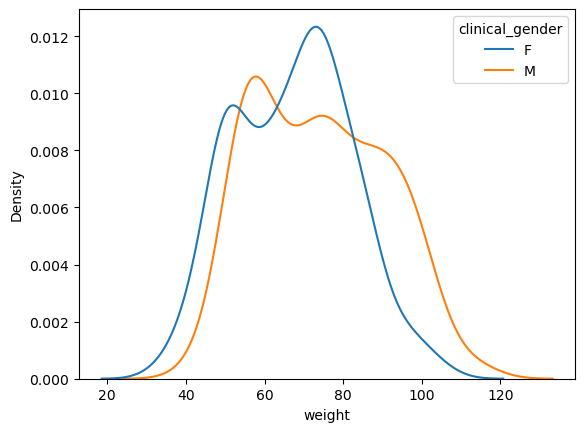

In [598]:
sns.kdeplot(data=df_user_data, x="weight", hue="clinical_gender")

In [ ]:
sns.countplot(data=df_user_join, x="user")

In [599]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,cynthiaa85a,maintain_fit,F,30-39,Very active,47.88,151,2293.0,vegan_observant,fish,healthy
1,gloria81ec,lose_weight,F,20-29,Lightly active,65.55,153,1452.0,None,None,overweight
2,karena0a0,gain_weight,F,90-100,Moderately active,41.04,151,2025.0,None,None,underweight
3,autumnbd78,maintain_fit,F,20-29,Moderately active,50.45,155,2219.0,vegetarian_observant,None,healthy
4,robert9174,maintain_fit,M,20-29,Sedentary,67.29,179,2049.0,None,None,healthy
...,...,...,...,...,...,...,...,...,...,...,...
495,justina50a,lose_weight,M,70-79,Very active,64.69,152,1892.0,None,None,overweight
496,tyler8373,lose_weight,M,60-69,Moderately active,66.40,154,1826.0,vegan_observant,soy,overweight
497,markb904,maintain_fit,M,80-89,Moderately active,72.65,186,2539.0,vegetarian_observant,shellfish,healthy
498,richard8319,lose_weight,M,50-59,Very active,75.31,164,2487.0,vegan_observant,fish,overweight


In [617]:
bernoulli.rvs(0.6, size=1)[0]

1

In [713]:
class HTML_Table:
    def __init__(self, cols:int = 4, rows: List[str] = None):
        self.cols = cols
        if rows is not None:
            self.rows = rows
        else:
            self.rows = []
    
    def add_rows(self, new_rows=List[str]):
        self.rows.extend(new_rows)
      
    def add_row(self, row:str):
        self.rows.append(row)
    
    def _repr_html_(self):
        return """<table border=\"1\">
        {row}
    </table>""".format(row="\n".join(self.rows))
    
    def render(self):
        return self._repr_html_()

In [739]:
table = HTML_Table()

In [745]:
table.add_row("<tr><th style=\"text-align: left;\">Tracking simulation: {} days</th></tr>".format(365))
table.add_row("<tr><th style=\"text-align: left;\">Total users: {}</th></tr>".format(500))
table.add_row("<tr><td colspan=\"2\">Clinical gender male: 50%</td><td colspan=\"2\">Clinical gender female: 50%</td></tr>")
table.add_row("<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>")
table.add_row("<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>")
table.add_row("<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>")
table.add_row("<tr>Nutrition summary</tr>")

In [741]:
print(table.render())

<table border="1">
        <tr><th style="text-align: left;">Total users: 500</th></tr>
<tr><td colspan="2">Clinical gender male: 50%</td><td colspan="2">Clinical gender female: 50%</td></tr>
<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>
<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>
<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>
    </table>


In [742]:
table

In [722]:
from IPython import display
from IPython.display import HTML

In [723]:
HTML(table.render())

In [667]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,cynthiaa85a,maintain_fit,F,30-39,Very active,47.88,151,2293.0,vegan_observant,fish,healthy
1,gloria81ec,lose_weight,F,20-29,Lightly active,65.55,153,1452.0,None,None,overweight
2,karena0a0,gain_weight,F,90-100,Moderately active,41.04,151,2025.0,None,None,underweight
3,autumnbd78,maintain_fit,F,20-29,Moderately active,50.45,155,2219.0,vegetarian_observant,None,healthy
4,robert9174,maintain_fit,M,20-29,Sedentary,67.29,179,2049.0,None,None,healthy
...,...,...,...,...,...,...,...,...,...,...,...
495,justina50a,lose_weight,M,70-79,Very active,64.69,152,1892.0,None,None,overweight
496,tyler8373,lose_weight,M,60-69,Moderately active,66.40,154,1826.0,vegan_observant,soy,overweight
497,markb904,maintain_fit,M,80-89,Moderately active,72.65,186,2539.0,vegetarian_observant,shellfish,healthy
498,richard8319,lose_weight,M,50-59,Very active,75.31,164,2487.0,vegan_observant,fish,overweight
